## Section -2 INDIA OIL Imports Analysis 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
india_imports = pd.read_csv(r"D:\Projects\Russia India Oil Trade\Phase-3 india imports data/india_oil_imports_estimated_jan2016_aug2025.csv")

In [4]:
india_imports

,Month,Year,Month-Year,Country,Volume(in Million Barrels),Global Oil Rate(USD/Barrel),TotalCost(USD -Millions)
0,January,2016,Jan-16,Iraq,14.200,31.68,449.70
1,January,2016,Jan-16,Saudi Arabia,13.800,31.68,437.00
2,January,2016,Jan-16,Nigeria,10.500,31.68,332.60
3,January,2016,Jan-16,United Arab Emirates,8.700,31.68,275.40
4,January,2016,Jan-16,United States,6.300,31.68,199.60
...,...,...,...,...,...,...,...
907,August,2025,Aug-25,Iraq,26.938,72.00,1939.52
908,August,2025,Aug-25,Saudi Arabia,22.448,72.00,1616.27
909,August,2025,Aug-25,UAE,11.972,72.00,862.01
910,August,2025,Aug-25,USA,8.979,72.00,646.51


In [5]:
Countrywise_grouped_imports = india_imports.groupby(["Year","Country"], as_index=False)[["Volume(in Million Barrels)","TotalCost(USD -Millions)"]].sum().sort_values(by="Year")

In [6]:
Countrywise_grouped_imports

,Year,Country,Volume(in Million Barrels),TotalCost(USD -Millions)
0,2016,Iraq,174.300,7538.40
1,2016,Kuwait,51.400,2222.20
2,2016,Nigeria,128.700,5565.40
3,2016,Others,4.800,207.20
4,2016,Russia,34.700,1502.50
...,...,...,...,...
72,2025,Iraq,215.504,15516.16
73,2025,Others,203.528,14654.16
74,2025,Russia,431.000,31032.32
75,2025,Saudi Arabia,179.584,12930.16


In [7]:
# Group by Year + Country
grouped = india_imports.groupby(["Year", "Country"], as_index=False)[
    "Volume(in Million Barrels)"
].sum()

# Total volume per year
yearly_total = grouped.groupby("Year")["Volume(in Million Barrels)"].transform("sum")

# Add percentage share column
grouped["Pct_Share"] = (grouped["Volume(in Million Barrels)"] / yearly_total) * 100


In [8]:
grouped.head(10)

,Year,Country,Volume(in Million Barrels),Pct_Share
0,2016,Iraq,174.3,21.537131
1,2016,Kuwait,51.4,6.351168
2,2016,Nigeria,128.7,15.902632
3,2016,Others,4.8,0.593105
4,2016,Russia,34.7,4.287656
5,2016,Saudi Arabia,169.5,20.944026
6,2016,United Arab Emirates,106.4,13.147164
7,2016,United States,77.2,9.539108
8,2016,Venezuela,62.3,7.698011
9,2017,Iraq,180.4,21.514609


In [9]:
## Step 2: Filter for 2022–2025

subset_2022_25 = grouped[grouped["Year"].between(2022, 2025)]


### Country Wise India Oil Imports Share (2022-2025) - Stacked Column Chart

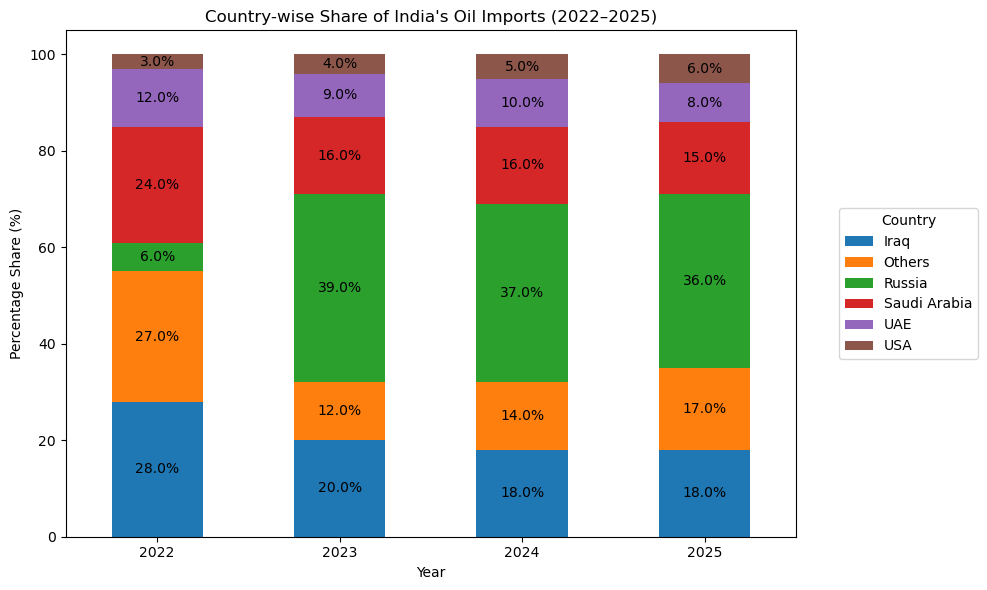

In [10]:
## ✅ Column Chart (stacked bar for yearly composition)

import matplotlib.pyplot as plt

# Pivot for stacked bar
pivot_df = subset_2022_25.pivot(index="Year", columns="Country", values="Pct_Share")

# Plot stacked bar
ax = pivot_df.plot(kind="bar", stacked=True, figsize=(10,6))

# Title and labels
plt.title("Country-wise Share of India's Oil Imports (2022–2025)")
plt.ylabel("Percentage Share (%)")

# Move legend to the right, centered vertically
plt.legend(title="Country", bbox_to_anchor=(1.05, 0.5), loc='center left')

# Add percentage labels on each stack
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



#### KPI

In [11]:
## 🔹 Step 1: Overall KPIs (2016–2025)

total_volume = india_imports["Volume(in Million Barrels)"].sum()
total_cost = india_imports["TotalCost(USD -Millions)"].sum()

print(f"Total Volume (2016–2025): {total_volume:,.2f} Million Barrels")
print(f"Total Cost   (2016–2025): ${total_cost:,.2f} Million USD")


Total Volume (2016–2025): 12,895.86 Million Barrels
Total Cost   (2016–2025): $861,150.89 Million USD


In [12]:
## 🔹 Step 2: Yearly KPIs

yearly_kpi = india_imports.groupby("Year")[["Volume(in Million Barrels)", "TotalCost(USD -Millions)"]].sum().reset_index()

yearly_kpi.rename(columns={
    "Volume(in Million Barrels)": "Total Volume (M Barrels)",
    "TotalCost(USD -Millions)": "Total Cost (M USD)"
}, inplace=True)

print(yearly_kpi)


   Year  Total Volume (M Barrels)  Total Cost (M USD)
0  2016                   809.300            34998.90
1  2017                   838.500            42705.30
2  2018                   976.900            63588.57
3  2019                  1097.300            62553.70
4  2020                  1365.400            53909.80
5  2021                  1497.100           102935.30
6  2022                  1705.680           153512.04
7  2023                  1704.228           127816.92
8  2024                  1704.228           132929.40
9  2025                  1197.224            86200.96


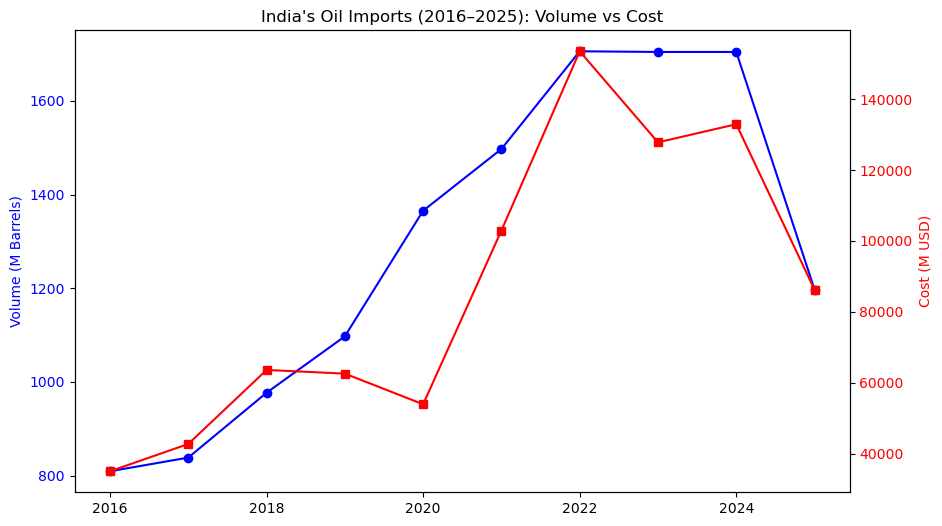

In [13]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(yearly_kpi["Year"], yearly_kpi["Total Volume (M Barrels)"], marker="o", label="Volume (M Barrels)", color="blue")
ax1.set_ylabel("Volume (M Barrels)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(yearly_kpi["Year"], yearly_kpi["Total Cost (M USD)"], marker="s", label="Cost (M USD)", color="red")
ax2.set_ylabel("Cost (M USD)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("India's Oil Imports (2016–2025): Volume vs Cost")
plt.show()


Top importers chart

## Final Chart 1

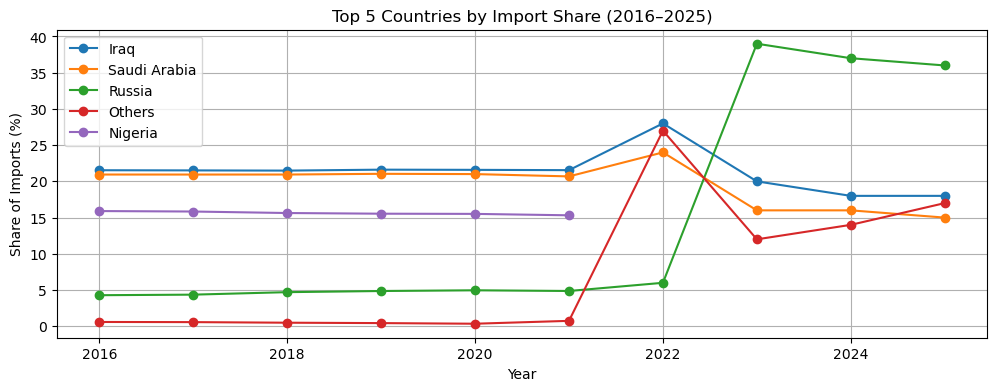

In [14]:
## By Percentage SHare

import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Group by Year & Country ---
countrywise = india_imports.groupby(["Year", "Country"], as_index=False)[
    ["Volume(in Million Barrels)", "TotalCost(USD -Millions)"]
].sum()

# --- Step 2: Calculate Total imports per Year ---
yearly_totals = countrywise.groupby("Year")[["Volume(in Million Barrels)"]].sum().reset_index()
yearly_totals.rename(columns={"Volume(in Million Barrels)": "Yearly_Total"}, inplace=True)

# Merge to calculate percentage share
countrywise = countrywise.merge(yearly_totals, on="Year", how="left")
countrywise["Share_%"] = (countrywise["Volume(in Million Barrels)"] / countrywise["Yearly_Total"]) * 100

# --- Step 3: Identify Top 5 Countries by overall share ---
top5_countries = (
    countrywise.groupby("Country")["Volume(in Million Barrels)"]
    .sum()
    .nlargest(5)
    .index
)

top5_df = countrywise[countrywise["Country"].isin(top5_countries)]

# --- Step 4: Line chart of Top 5 by Share ---
plt.figure(figsize=(12,4))
for c in top5_countries:
    subset = top5_df[top5_df["Country"] == c]
    plt.plot(subset["Year"], subset["Share_%"], marker="o", label=c)

plt.title("Top 5 Countries by Import Share (2016–2025)")
plt.xlabel("Year")
plt.ylabel("Share of Imports (%)")
plt.legend()
plt.grid(True)
plt.show()


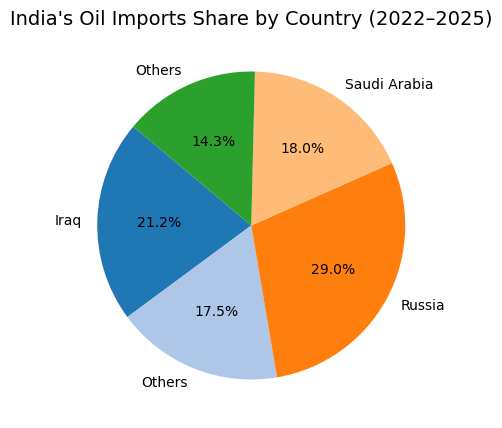

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter Top 5 data for 2022–2025
top5_recent = top5_df[top5_df["Year"].between(2022, 2025)]

# Total volume per Top 5 country (2022–2025)
top5_totals_recent = top5_recent.groupby("Country")["Volume(in Million Barrels)"].sum()

# Calculate 'Others' for 2022–2025
countrywise_recent = countrywise[countrywise["Year"].between(2022, 2025)]
others_volume = countrywise_recent["Volume(in Million Barrels)"].sum() - top5_totals_recent.sum()

# Combine Top 5 + Others
pie_data_recent = pd.concat([top5_totals_recent, pd.Series({"Others": others_volume})])

# Plot Pie Chart
plt.figure(figsize=(5,5))
plt.pie(
    pie_data_recent,
    labels=pie_data_recent.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title("India's Oil Imports Share by Country (2022–2025)", fontsize=14)
plt.show()


📊 India Oil Imports Analysis Summary

Russia: From 2016 to 2021, Russia’s share in India’s oil imports was very low (~5%). After the Russia–Ukraine war, global oil prices surged, and Russia offered discounted oil, leading to a sharp increase in both share and import volumes post-2022.

Saudi Arabia & Iraq: Traditionally India’s largest suppliers, but unlike Russia, both percentage share and absolute import volumes decreased slightly in recent years, reflecting India’s diversification strategy.

Other Suppliers: The Top 5 countries still dominate overall imports, while smaller suppliers contribute the remaining portion.

Overall Trend: India is shifting its supplier mix, leveraging geopolitical opportunities (like discounted Russian oil) while reducing dependency on traditional suppliers like Saudi Arabia, balancing volume, cost, and supply security.

## China Data - Analysis

In [16]:
china_data = pd.read_csv(r"D:\Projects\Russia India Oil Trade\Phase-3 india imports data/china_oil_imports_2016_2025.csv")

china_data.head(2)

,year,Country,Amount(Mill -Barrels),Total Cost(Mill-USD)
0,2016,Russia,523.8,22523
1,2016,Saudi Arabia,510.2,21939


In [17]:
china_data.columns

Index(['year', 'Country', 'Amount(Mill -Barrels)', 'Total Cost(Mill-USD)'], dtype='object')

In [18]:
china_data.dtypes

year                       int64
Country                   object
Amount(Mill -Barrels)    float64
Total Cost(Mill-USD)       int64
dtype: object

 ### Top 5 Supplier Countries – China Oil Imports (2016–2025) 

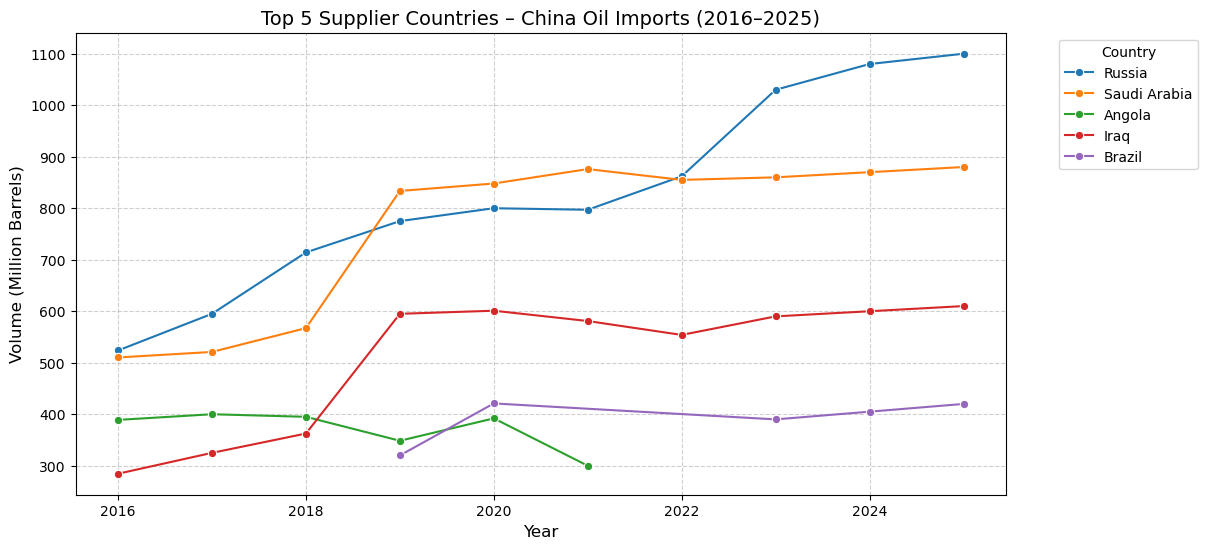

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Identify Top 5 countries by total imports ---
top5_china = (
    china_data.groupby("Country")["Amount(Mill -Barrels)"]
    .sum()
    .nlargest(5)
    .index
)

# --- Step 2: Filter data for Top 5 countries ---
top5_df_china = china_data[china_data["Country"].isin(top5_china)]

# --- Step 3: Line Chart ---
plt.figure(figsize=(12,6))
sns.lineplot(
    data=top5_df_china, 
    x="year", 
    y="Amount(Mill -Barrels)", 
    hue="Country", 
    marker="o"
)

plt.title("Top 5 Supplier Countries – China Oil Imports (2016–2025)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Volume (Million Barrels)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1))
plt.show()


#### China Top 5 Suppliers in Percentage Terms - Pie Chart

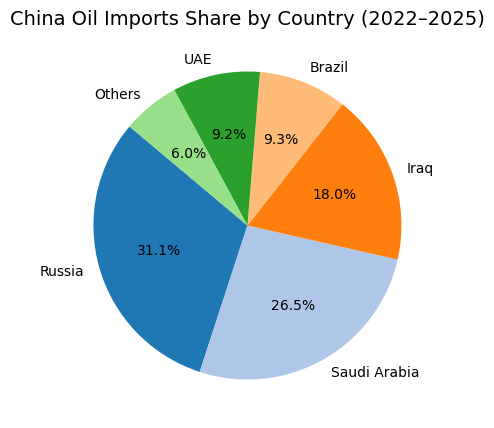

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Filter data for 2022–2025 ---
china_recent = china_data[china_data["year"].between(2022, 2025)]

# --- Step 2: Total volume per Top 5 country ---
top5_totals = (
    china_recent.groupby("Country")["Amount(Mill -Barrels)"]
    .sum()
    .nlargest(5)
)

# --- Step 3: Calculate 'Others' volume ---
others_volume = china_recent["Amount(Mill -Barrels)"].sum() - top5_totals.sum()

# --- Step 4: Combine Top 5 + Others ---
pie_data = pd.concat([top5_totals, pd.Series({"Others": others_volume})])

# --- Step 5: Plot Pie Chart ---
plt.figure(figsize=(5,5))
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title("China Oil Imports Share by Country (2022–2025)", fontsize=14)
plt.show()


### Stacked Column Chart

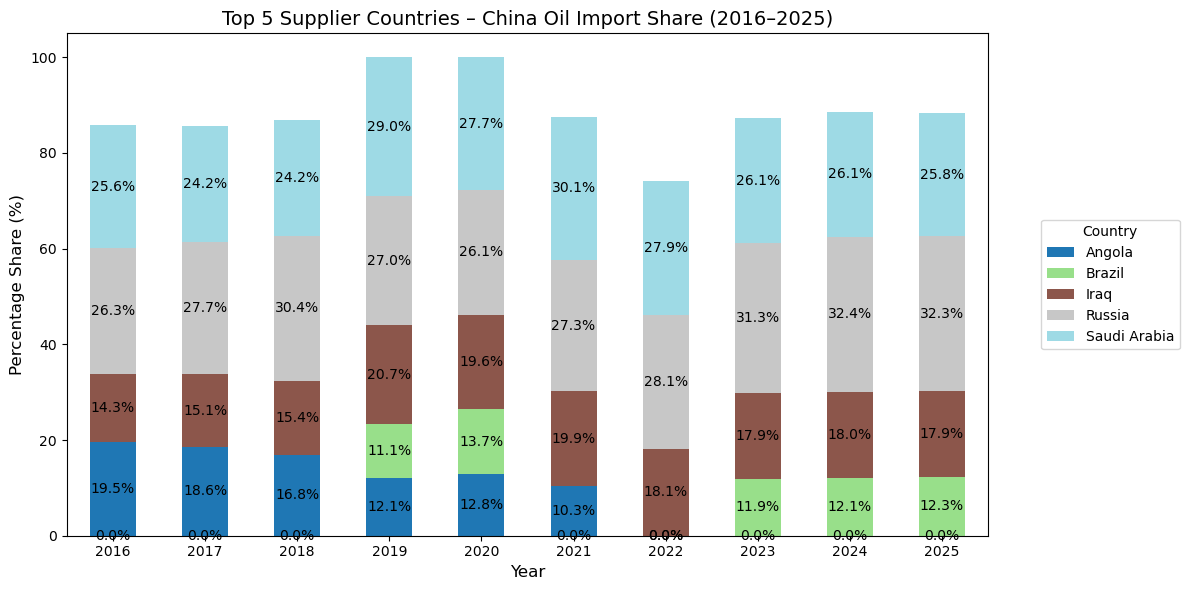

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Pivot data for stacked bar
pivot_china = top5_df_china.pivot(index="year", columns="Country", values="Share_%")

# Step 2: Plot stacked column chart
ax = pivot_china.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20")

# Title and labels
plt.title("Top 5 Supplier Countries – China Oil Import Share (2016–2025)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage Share (%)", fontsize=12)

# Move legend outside on right, centered vertically
plt.legend(title="Country", bbox_to_anchor=(1.05, 0.5), loc='center left')

# Add percentage labels inside each stack
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### INSIGHTS -

📊 China Oil Imports Analysis Summary

Russia: China’s imports from Russia increased post-2022, but even 2016–2021 had significant volumes, reflecting a long-standing supply relationship.

Saudi Arabia: The percentage share decreased over time, but the absolute volume (million barrels) remained fairly constant, indicating steady supply despite diversification.

Infrastructure Influence: China leverages pipelines for crude oil, gas, and LNG, which supports consistent imports and reduces dependency on maritime shipments.

Overall Trend: China is diversifying suppliers while maintaining strategic relationships with major players like Russia and Saudi Arabia.

📊 Comparative Analysis – India vs China Oil Imports

India:

Russia: Both import volume and share increased sharply post-2022, following the Russia–Ukraine war and discounted oil offers. Previously (2016–2021), Russia’s share was very low (~5%).

Saudi Arabia & Iraq: Both import volume and share decreased, indicating a shift in India’s supplier mix.

Overall Trend: India is diversifying suppliers while strategically leveraging geopolitical opportunities (discounted Russian oil).

China:

Russia: Import volume steadily increased, with share also increasing at a higher rate, showing growing dependency but a more gradual trend compared to India’s sharp jump.

Saudi Arabia & Iraq: Volume remained almost constant, but percentage share decreased, reflecting slower growth relative to Russia.

Infrastructure Advantage: China’s pipelines for oil, LNG, and gas support stable imports and reduce reliance on maritime shipments.

Overall Trend: China is gradually shifting supplier shares, maintaining stable volumes from traditional suppliers while increasing imports from Russia.